<a href="https://colab.research.google.com/github/milicadimitrijevic5/masinsk-oucenje/blob/main/dijabetesdobar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#uvek unosis

In [ ]:
data= pd.read_csv('diabetes_risk_prediction_dataset.csv')
data.head()
#ucitavas bazu, pravi tabelu

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [ ]:
data= data.replace('Male', 1)
data= data.replace('Female', 0)
data= data.replace('Yes', 1)
data= data.replace('No', 0)
data= data.replace('Positive', 1)
data= data.replace('Negative', 0)
#replejsujes ne numericke vrednosti uvek 1 i 0 kad imas dve opcije

In [ ]:
cor= data.corr().iloc[-1].sort_values(ascending=True)
display(cor)
#da ti vidi korelaciju sa odredjenom promenljivom

Gender               -0.449233
Alopecia             -0.267512
Itching              -0.013384
delayed healing       0.046980
Obesity               0.072173
Age                   0.108679
Genital thrush        0.110288
muscle stiffness      0.122474
weakness              0.243275
visual blurring       0.251300
Irritability          0.299467
Polyphagia            0.342504
partial paresis       0.432288
sudden weight loss    0.436568
Polydipsia            0.648734
Polyuria              0.665922
class                 1.000000
Name: class, dtype: float64

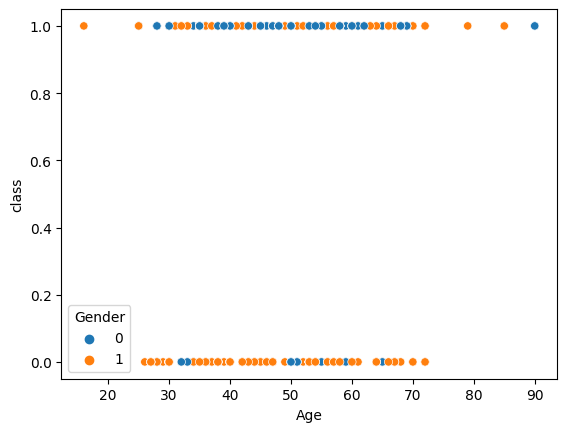

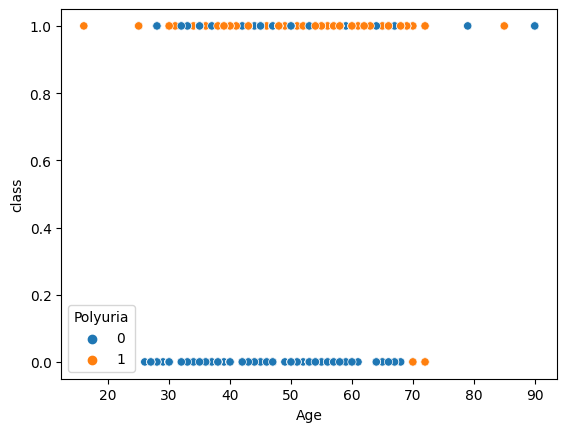

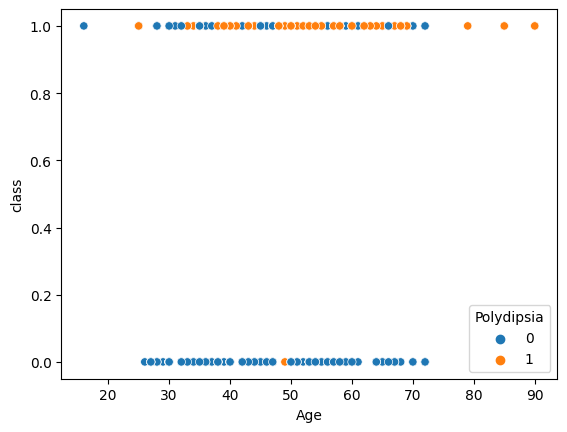

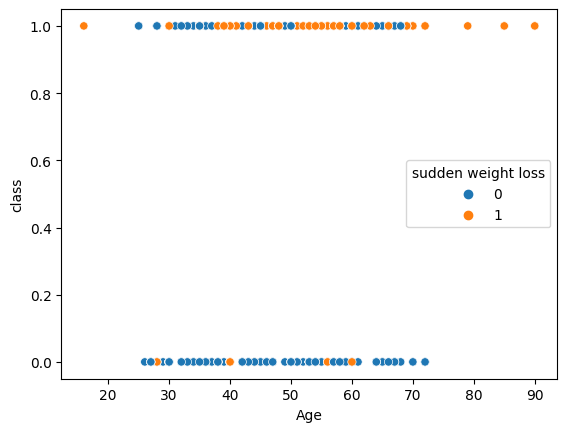

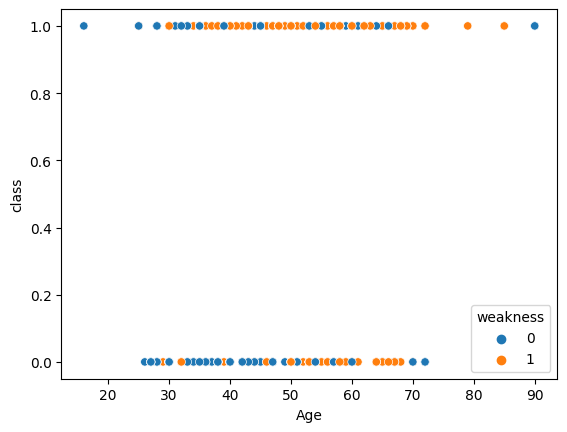

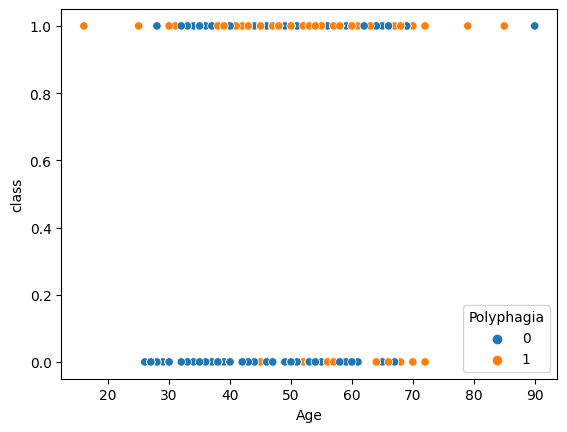

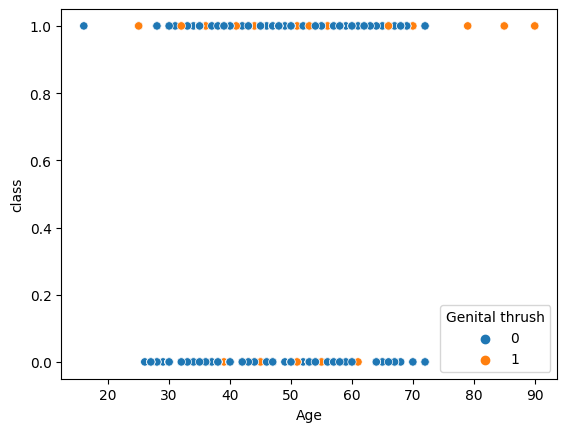

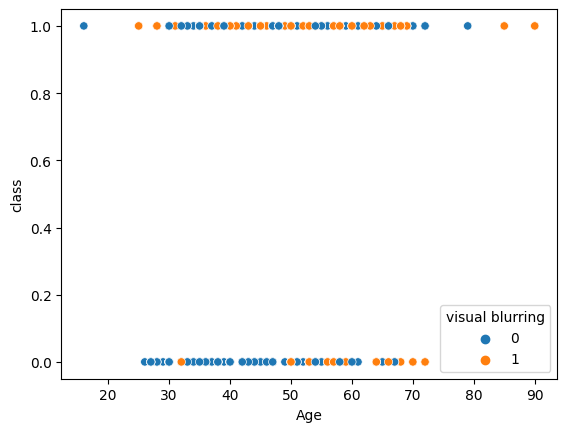

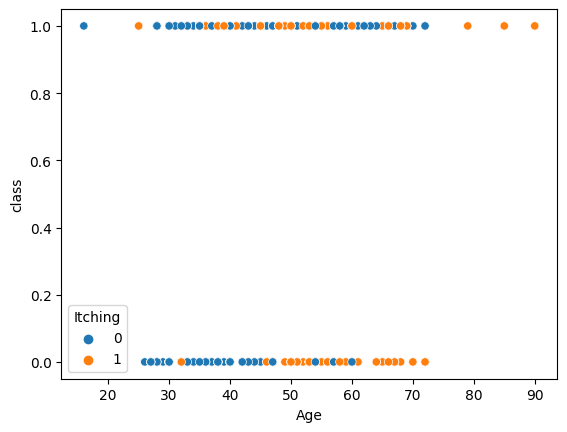

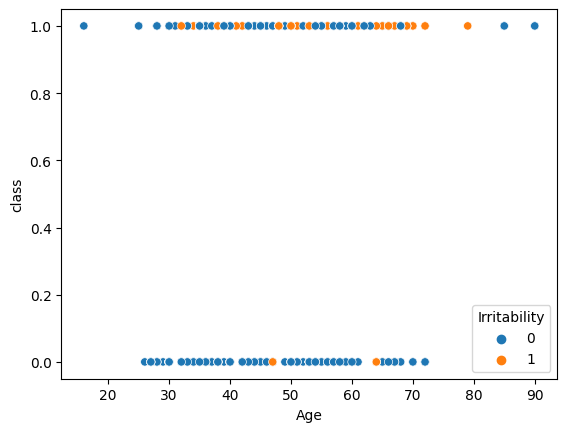

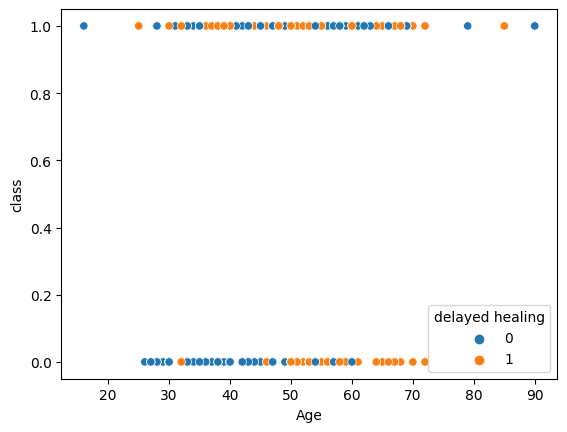

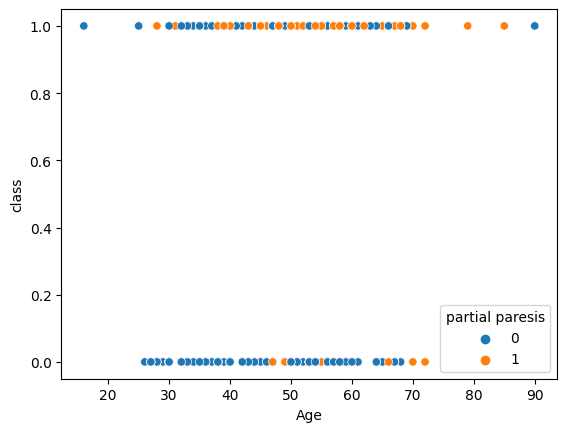

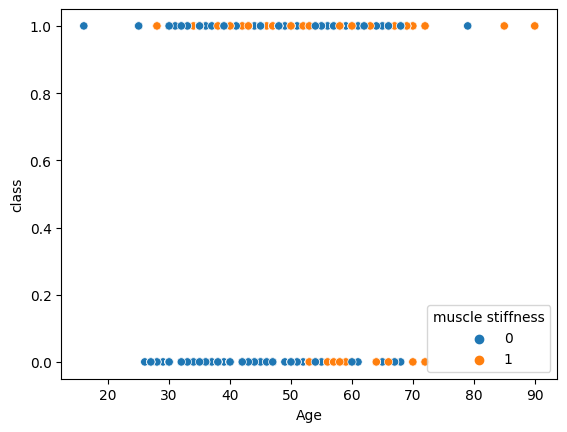

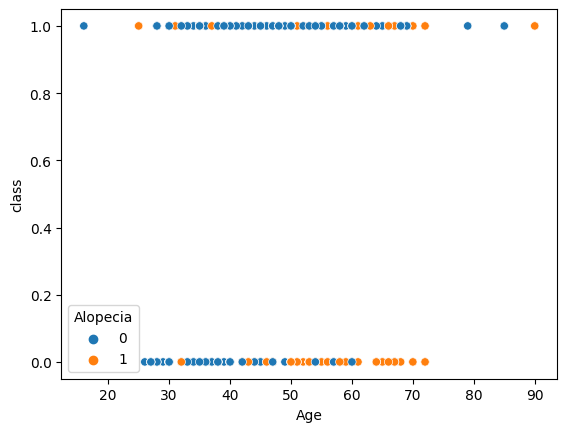

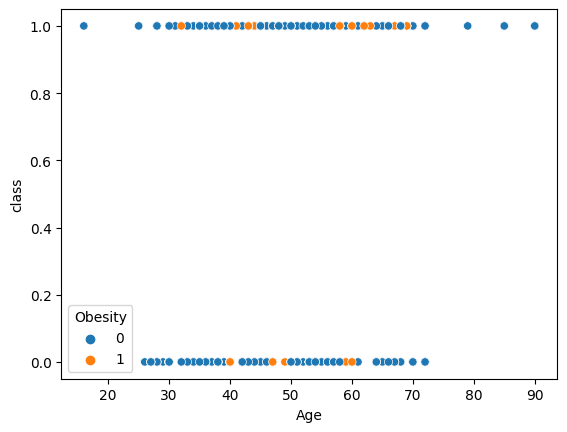

In [ ]:
import matplotlib.pyplot as plt

sns.scatterplot(data, x=data['Age'], y=data['class'], hue=data['Gender'])
plt.show()
sns.scatterplot(data, x=data['Age'], y=data['class'], hue=data['Polyuria'])
plt.show()
sns.scatterplot(data, x=data['Age'], y=data['class'],hue=data['Polydipsia'])
plt.show()
sns.scatterplot(data, x=data['Age'], y=data['class'],hue=data['sudden weight loss'])
plt.show()
sns.scatterplot(data, x=data['Age'], y=data['class'],hue=data['weakness'])
plt.show()
sns.scatterplot(data, x=data['Age'], y=data['class'],hue=data['Polyphagia'])
plt.show()
sns.scatterplot(data, x=data['Age'], y=data['class'],hue=data['Genital thrush'])
plt.show()
sns.scatterplot(data, x=data['Age'], y=data['class'],hue=data['visual blurring'])
plt.show()
sns.scatterplot(data, x=data['Age'], y=data['class'],hue=data['Itching'])
plt.show()
sns.scatterplot(data, x=data['Age'], y=data['class'],hue=data['Irritability'])
plt.show()
sns.scatterplot(data, x=data['Age'], y=data['class'],hue=data['delayed healing'])
plt.show()
sns.scatterplot(data, x=data['Age'], y=data['class'],hue=data['partial paresis'])
plt.show()
sns.scatterplot(data, x=data['Age'], y=data['class'],hue=data['muscle stiffness'])
plt.show()
sns.scatterplot(data, x=data['Age'], y=data['class'],hue=data['Alopecia'])
plt.show()
sns.scatterplot(data, x=data['Age'], y=data['class'],hue=data['Obesity'])
plt.show()
#crta grafike,x y je za grafik, hue-sta ja zapravo odrecujem tackice tj ostale promenljive koje imaju vrednosti 0 i 1

# Logisticka regresija

In [4]:
from sklearn.model_selection import train_test_split

train, test= train_test_split(data, test_size=0.2)
print(len(train))
print(len(test))
#genericki ovo ti je za train test copy paste, prvi broj koliko njih testiras drugi broj mi je koliko testiram

NameError: name 'data' is not defined

In [ ]:
from sklearn.linear_model import LogisticRegression

model= LogisticRegression()
model.fit(train[['Polyuria']], train['class'])
# logisticka regresija ya dve promenljive

LogisticRegression()

In [3]:
from sklearn.metrics import classification_report

y_true= test['class']
y_pred= model.predict(test[['Polyuria']])

print(classification_report(y_true, y_pred, target_names=['Positive','Negative']))
# ovo su metrike


NameError: name 'test' is not defined

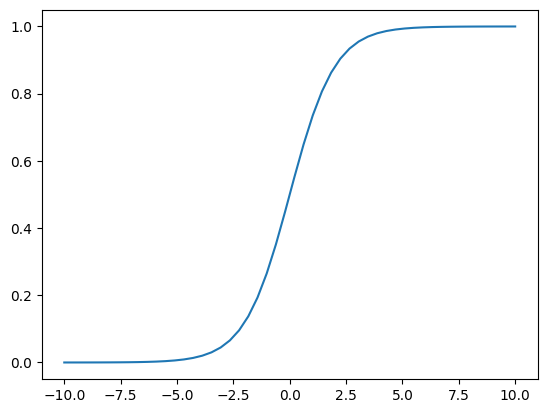

In [ ]:
sigmoid = lambda x, b0, b1 : 1 / (1 + np.e ** -(b0 + b1*x))
x = np.linspace(-10,10)
y = sigmoid(x, 0, 1)
sns.lineplot(x=x, y=y)
plt.show()

<Axes: xlabel='Polyuria', ylabel='class'>

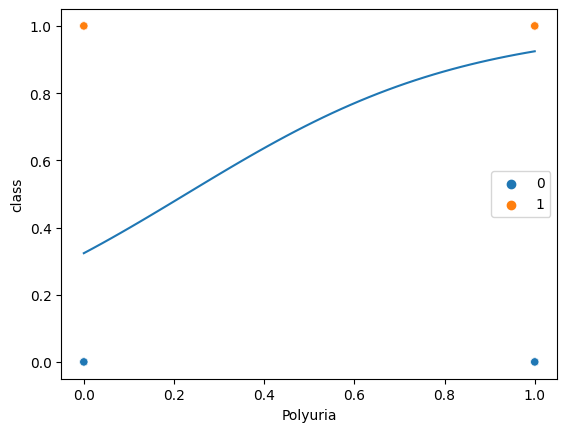

In [ ]:
x = np.linspace(test['Polyuria'].min(), test['Polyuria'].max())
y = sigmoid(x, model.intercept_, model.coef_[0])
sns.scatterplot(test, x='Polyuria', y='class', hue='class')
sns.lineplot(x=x, y=y)

# KNN

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data.drop('class',axis=1))
scaled_features = scaler.transform(data.drop('class',axis=1))

data_new = pd.DataFrame(scaled_features)
data_new.head()
#

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.661367,0.765092,-0.992337,1.109847,-0.846269,0.839594,-0.915126,-0.535844,-0.901025,1.027295,-0.565506,1.084312,-0.869918,1.290994,1.380227,2.215647
1,0.821362,0.765092,-0.992337,-0.901025,-0.846269,0.839594,-0.915126,-0.535844,1.109847,-0.973430,-0.565506,-0.922244,1.149534,-0.774597,1.380227,-0.451335
2,-0.578993,0.765092,1.007722,-0.901025,-0.846269,0.839594,1.092746,-0.535844,-0.901025,1.027295,-0.565506,1.084312,-0.869918,1.290994,1.380227,-0.451335
3,-0.249498,0.765092,-0.992337,-0.901025,1.181657,0.839594,1.092746,1.866215,-0.901025,1.027295,-0.565506,1.084312,-0.869918,-0.774597,-0.724518,-0.451335
4,0.986110,0.765092,1.007722,1.109847,1.181657,0.839594,1.092746,-0.535844,1.109847,1.027295,1.768328,1.084312,1.149534,1.290994,1.380227,2.215647


In [ ]:
from sklearn.model_selection import train_test_split
X = data_new
y = data['class']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4)
#uvek pises ovj zadnji deo,

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)
#ovo celo uvek treb

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
#classification report uvek treba ovaj confuson ne

[[ 89   0]
 [  5 114]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        89
           1       1.00      0.96      0.98       119

    accuracy                           0.98       208
   macro avg       0.97      0.98      0.98       208
weighted avg       0.98      0.98      0.98       208



In [ ]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94        78
           1       0.99      0.93      0.96       130

    accuracy                           0.95       208
   macro avg       0.94      0.96      0.95       208
weighted avg       0.96      0.95      0.95       208



# Linearna regresija

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train[['Polyuria']], train['class'])
#uvek treba

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
import math

y_true = test['class']
y_pred = model.predict(test[['Polyuria']])

rmse = math.sqrt(mean_squared_error(y_true, y_pred))
print(rmse)
#uvek tako

0.3342871898569265


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

data = data[['Polyuria', 'class']]
data = data.rename(columns={"Polyuria":"X", 'class': 'Y'})
train, test = train_test_split(data, test_size=0.2, random_state=42)

# racunamo beta
x_mean = np.mean(train["X"])
y_mean = np.mean(train["Y"])
brojilac = 0
imenilac = 0
for index, row in train.iterrows():
  x = row[0]
  y = row[1]
  brojilac += (x - x_mean)*(y-y_mean)
  imenilac += (x - x_mean) ** 2

beta = brojilac/imenilac

# racunamo alpha
alpha = y_mean - beta * x_mean
#sve kopiraj ovo rucno racunanje rmse

In [ ]:
## definicija metrika
import math
def rmse(y_true, y_pred):
  sum = 0
  for yt, yp in zip(y_true, y_pred):
    sum += (yt - yp) ** 2
  return math.sqrt(sum / len(y_true))

def mae(y_true, y_pred):
  sum = 0
  for yt, yp in zip(y_true, y_pred):
    sum += abs(yt - yp)
  return sum / len(y_true)

In [ ]:
model = lambda x, alpha, beta: alpha + beta * x
y_pred = model(test['X'], alpha, beta)
y_true = test['Y']

print(rmse(y_true, y_pred))
print(mae(y_true, y_pred))
# rmse i mae rucno


0.3742233836545196
0.2622952715832337


In [ ]:
x= data.iloc[:, [0,1]].values
y= data.iloc[:, 1].values

# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

#feature Scaling
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)


from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred= classifier.predict(x_test)
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))


[[56  0]
 [ 0 74]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        74

    accuracy                           1.00       130
   macro avg       1.00      1.00      1.00       130
weighted avg       1.00      1.00      1.00       130

